<h2>03 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

<h4>[Y=4X+6 시뮬레이션하는 데이터 값 생성]

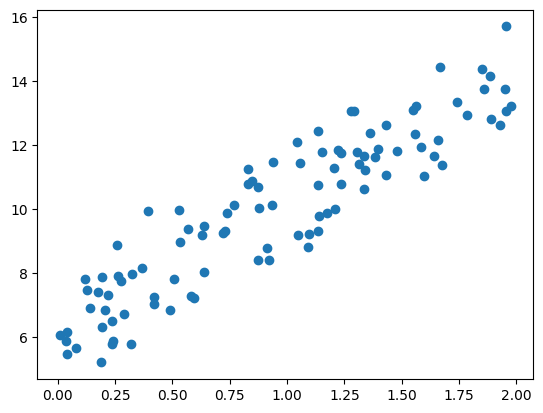

In [51]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+ np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [52]:
X.shape, y.shape

((100, 1), (100, 1))

<h4>[w0과 w1의 값을 최소화 할 수 있도록 업데이트 수행하는 함수 생성]</h4>
<br>
<li>예측 배열 y_pred는 np.dot(X, w1.T) + w0 임. 
<br>100개의 데이터 X(1,2,...,100)이 있다면 예측값은 w0 + X(1)w1 + X(2)w1 +..+ X(100)*w1이며, 이는 입력 배열 X와 w1 배열의 내적임.
<li>새로운 w1과 w0를 update함 

In [53]:
# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [54]:
w0 = np.zeros((1,1))
w1 = np.zeros((1,1))
y_pred = np.dot(X, w1.T) + w0
diff = y-y_pred
print(diff.shape)
w0_factors = np.ones((100,1))
w1_update = -(2/100)*0.01*(np.dot(X.T, diff))
w0_update = -(2/100)*0.01*(np.dot(w0_factors.T, diff))   
print(w1_update.shape, w0_update.shape)
w1, w0

(100, 1)
(1, 1) (1, 1)


(array([[0.]]), array([[0.]]))

<h4>[get_weigth_updates()를 경사 하강 방식으로 반복적으로 수행하여 w1과 w0을 업데이트 하는 함수 생성]

In [55]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

<h4>[예측 오차 비용을 계산을 수행하는 함수 생성 및 경사 하강법 수행]

In [56]:
# 비용 함수인 get_cost() 정의
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N  # np.square는 배열의 요소별 제곱을 계산
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


-> 출력 결과 실제 선형식인 y = 4X + 6과 유사하게 w1은 4.022, w0은 6.162가 도출됨.
<br>예측 오류 비용은 0.9935임.

<h4>[y_pred에 기반한 회귀선 출력]

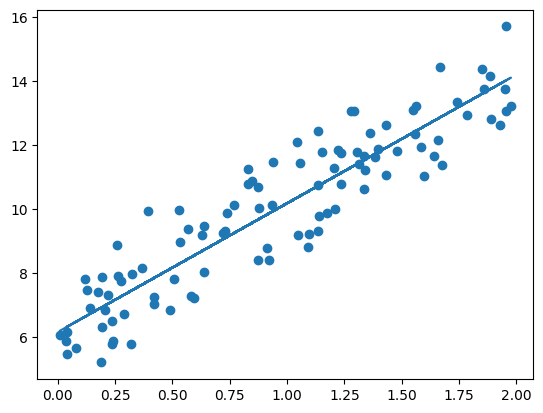

In [57]:
plt.scatter(X, y)
plt.plot(X,y_pred)

<h4>[미니 배치 확률적 경사 하강법을 이용한 최적 비용함수 도출]

In [58]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index =0
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터 추출하여 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [59]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:",round(w1[0,0],3),"w0:",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


-> 출력 결과 경사 하강법으로 구한 w1, w0과 큰 차이가 없으며,
<br>예측 오류 비용 또한 경사 하강법으로 구한것 보다 아주 조금 높을 뿐 큰 예측 성능상의 차이가 없음.

<hr>

<h2>04 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [60]:
'''import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거
%matplotlib inline

# boston 데이타셋 로드
boston = pd.read_csv('D:/WE_IT/doit/파이썬머신러닝완벽가이드/data/boston_data.csv')

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()'''

"import numpy as np\nimport matplotlib.pyplot as plt\nimport pandas as pd\nimport seaborn as sns\nfrom scipy import stats\nimport warnings\nwarnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거\n%matplotlib inline\n\n# boston 데이타셋 로드\nboston = pd.read_csv('D:/WE_IT/doit/파이썬머신러닝완벽가이드/data/boston_data.csv')\n\n# boston 데이타셋 DataFrame 변환 \nbostonDF = pd.DataFrame(boston)\n\n# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. \nbostonDF['PRICE'] = boston.target\nprint('Boston 데이타셋 크기 :',bostonDF.shape)\nbostonDF.head()"

<li>CRIM: 지역별 범죄 발생률
<li>ZN: 25,000평방피트를 초과하는 거주 지역의 비율
<li>NDUS: 비상업 지역 넓이 비율
<li>CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
<li>NOX: 일산화질소 농도
<li>RM: 거주할 수 있는 방 개수
<li>AGE: 1940년 이전에 건축된 소유 주택의 비율
<li>DIS: 5개 주요 고용센터까지의 가중 거리
<li>RAD: 고속도로 접근 용이도
<li>TAX: 10,000달러당 재산세율
<li>PTRATIO: 지역의 교사와 학생 수 비율
<li>B: 지역의 흑인 거주 비율
<li>LSTAT: 하위 계층의 비율
<li>MEDV: 본인 소유의 주택 가격(중앙값)
<br>
<br>
<li>각 컬럼별로 주택가격에 미치는 영향도를 조사

In [61]:
'''# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

fig1 = plt.gcf()
fig1.savefig('p322_boston.tif', format='tif', dpi=300, bbox_inches='tight')'''

"# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.\nfig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)\nlm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']\nfor i , feature in enumerate(lm_features):\n    row = int(i/4)\n    col = i%4\n    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현\n    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])\n\nfig1 = plt.gcf()\nfig1.savefig('p322_boston.tif', format='tif', dpi=300, bbox_inches='tight')"

학습과 테스트 데이터 세트로 분리하고 학습/예측/평가 수행

In [62]:
'''from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))'''

"from sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.metrics import mean_squared_error, r2_score\n\ny_target = bostonDF['PRICE']\nX_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)\n\nX_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)\n\n# Linear Regression OLS로 학습/예측/평가 수행. \nlr = LinearRegression()\nlr.fit(X_train ,y_train )\ny_preds = lr.predict(X_test)\nmse = mean_squared_error(y_test, y_preds)\nrmse = np.sqrt(mse)\n\nprint('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))\nprint('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))"

In [63]:
'''print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))'''

"print('절편 값:',lr.intercept_)\nprint('회귀 계수값:', np.round(lr.coef_, 1))"

In [64]:
'''# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 칼럼명에 유의
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)'''

'# 회귀 계수를 큰 값 순으로 정렬하기 위해 Series로 생성. index가 칼럼명에 유의\ncoeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )\ncoeff.sort_values(ascending=False)'

In [65]:
'''from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))'''

'from sklearn.model_selection import cross_val_score\n\ny_target = bostonDF[\'PRICE\']\nX_data = bostonDF.drop([\'PRICE\'],axis=1,inplace=False)\nlr = LinearRegression()\n\n# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. \nneg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)\nrmse_scores  = np.sqrt(-1 * neg_mse_scores)\navg_rmse = np.mean(rmse_scores)\n\n# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 \nprint(\' 5 folds 의 개별 Negative MSE scores: \', np.round(neg_mse_scores, 2))\nprint(\' 5 folds 의 개별 RMSE scores : \', np.round(rmse_scores, 2))\nprint(\' 5 folds 의 평균 RMSE : {0:.3f} \'.format(avg_rmse))'

<hr>

<h2>05 다항 회귀와 과(대)적합/과소적합 이해

<h4>[PolynomialFeatures 클래스를 통해 피처를 다항식 피처로 변환]

In [66]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


-> 출력 결과 2차로 이렇게 변한다는 것을 알 수 있었음.

<h4>[3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성]</h4>

<li>회귀식은 결정값 y = 1+ 2x_1 + 3x_1^2 + 4x_2^3

In [67]:
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]


<일차 단항식 계수를 삼차 다항식 계수로 변환>

In [68]:
# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


-> 출력 결과를 살펴보면 원래 다항식의 계수 값인 [1, 2, 0, 3, 0, 0, 0, 0, 0, 4]와 차이는 있지만, 다항 회귀로 근사하고 있음을 알 수 있음

<h4>[사이킷런의 파이프라인(Pipeline) 객체를 이용하여 한 번에 다항 회귀 구현]</h4>
<li>위의 예제처럼 피처 변환과 선형 회귀 따로따로 하는 것 보다 코드가 더 명료해짐.

In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline 하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


<h4>[다항 회귀를 이용한 과소적합 및 과적합 이해]</h4>
<li>코사인(cosine) 곡선에 약간의 잡음(Noise) 변동값을 더하여 실제값 곡선을 만듬

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환 값을 반환.
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 X의 코사인 값에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1

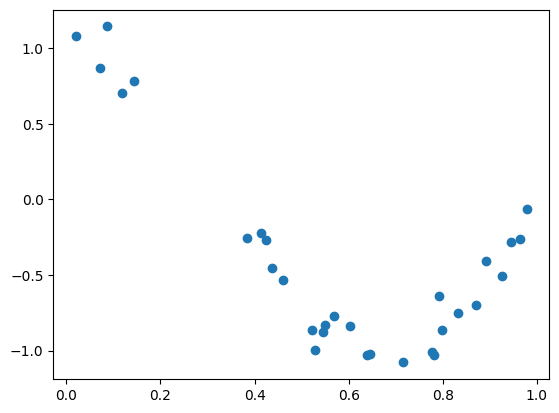

In [71]:
plt.scatter(X, y)

<예측 결과를 비교할 다항식 차수를 각각 1,4,15로 변경하면서 예측 결과를 비교>


Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE 는 0.40772896250986845 입니다.

Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE 는 0.043208749872317556 입니다.

Degree 15 회귀 계수는 [-2.98295000e+03  1.03900050e+05 -1.87417308e+06  2.03717524e+07
 -1.44874234e+08  7.09320168e+08 -2.47067524e+09  6.24565587e+09
 -1.15677381e+10  1.56896159e+10 -1.54007266e+10  1.06458152e+10
 -4.91381762e+09  1.35920853e+09 -1.70382347e+08] 입니다.
Degree 15 MSE 는 181777900.10696036 입니다.


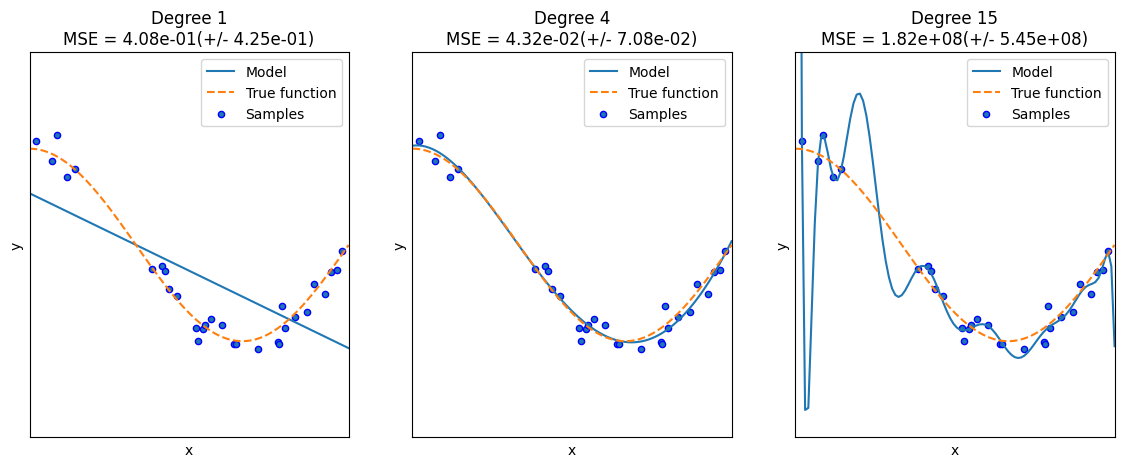

In [72]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    # Pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))
          
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()

-> 출력 결과 과소적합 / 가장 뛰어난 예측 성능 / 과적합 순인 것을 알 수 있음.

<hr>

<h2>06 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷

Regularized Linear Model - Ridge Regression

In [73]:
'''# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용 
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)


ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))'''

'# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용 \nfrom sklearn.linear_model import Ridge\nfrom sklearn.model_selection import cross_val_score\n\n# boston 데이타셋 로드\nboston = load_boston()\n\n# boston 데이타셋 DataFrame 변환 \nbostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)\n\n# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. \nbostonDF[\'PRICE\'] = boston.target\n\ny_target = bostonDF[\'PRICE\']\nX_data = bostonDF.drop([\'PRICE\'],axis=1,inplace=False)\n\n\nridge = Ridge(alpha = 10)\nneg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)\nrmse_scores  = np.sqrt(-1 * neg_mse_scores)\navg_rmse = np.mean(rmse_scores)\nprint(\' 5 folds 의 개별 Negative MSE scores: \', np.round(neg_mse_scores, 3))\nprint(\' 5 folds 의 개별 RMSE scores : \', np.round(rmse_scores,3))\nprint(\' 5 folds 의 평균 RMSE : {0:.3f} \'.format(avg_rmse))'

alpha값을 0 , 0.1 , 1 , 10 , 100 으로 변경하면서 RMSE 측정

In [74]:
'''# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha, avg_rmse))'''

'# 릿지에 사용될 alpha 파라미터의 값을 정의\nalphas = [0, 0.1, 1, 10, 100]\n\n# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.\nfor alpha in alphas :\n    ridge = Ridge(alpha = alpha)\n    \n    # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산\n    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)\n    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))\n    print(\'alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} \'.format(alpha, avg_rmse))'

각 alpha에 따른 회귀 계수 값을 시각화. 각 alpha값 별로 plt.subplots로 맷플롯립 축 생성

In [75]:
'''# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()'''

"# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  \nfig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)\n# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  \ncoeff_df = pd.DataFrame()\n\n# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정\nfor pos , alpha in enumerate(alphas) :\n    ridge = Ridge(alpha = alpha)\n    ridge.fit(X_data , y_target)\n    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  \n    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )\n    colname='alpha:'+str(alpha)\n    coeff_df[colname] = coeff\n    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현\n    coeff = coeff.sort_values(ascending=False)\n    axs[pos].set_title(colname)\n    axs[pos].set_xlim(-3,6)\n    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])\n\n# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시\nplt.show()"

alpha 값에 따른 컬럼별 회귀계수 출력

In [76]:
'''ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)'''

"ridge_alphas = [0 , 0.1 , 1 , 10 , 100]\nsort_column = 'alpha:'+str(ridge_alphas[0])\ncoeff_df.sort_values(by=sort_column, ascending=False)"

라쏘 회귀

In [77]:
'''from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df
# end of get_linear_regre_eval'''

'from sklearn.linear_model import Lasso, ElasticNet\n\n# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환 \ndef get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, \n                        verbose=True, return_coeff=True):\n    coeff_df = pd.DataFrame()\n    if verbose : print(\'####### \', model_name , \'#######\')\n    for param in params:\n        if model_name ==\'Ridge\': model = Ridge(alpha=param)\n        elif model_name ==\'Lasso\': model = Lasso(alpha=param)\n        elif model_name ==\'ElasticNet\': model = ElasticNet(alpha=param, l1_ratio=0.7)\n        neg_mse_scores = cross_val_score(model, X_data_n, \n                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)\n        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))\n        print(\'alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} \'.format(param, avg_rmse))\n        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출\n        \n        model.fi

In [78]:
'''# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)'''

"# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출\nlasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]\ncoeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)"

In [79]:
'''# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)'''

"# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력\nsort_column = 'alpha:'+str(lasso_alphas[0])\ncoeff_lasso_df.sort_values(by=sort_column, ascending=False)"

엘라스틱넷 회귀

In [80]:
'''# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)'''

"# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출\n# l1_ratio는 0.7로 고정\nelastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]\ncoeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,\n                                      X_data_n=X_data, y_target_n=y_target)"

In [81]:
'''# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)'''

"# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력\nsort_column = 'alpha:'+str(elastic_alphas[0])\ncoeff_elastic_df.sort_values(by=sort_column, ascending=False)"

선형 회귀 모델을 위한 데이터 변환

In [82]:
'''from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data'''

"from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures\n\n# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정\n# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. \ndef get_scaled_data(method='None', p_degree=None, input_data=None):\n    if method == 'Standard':\n        scaled_data = StandardScaler().fit_transform(input_data)\n    elif method == 'MinMax':\n        scaled_data = MinMaxScaler().fit_transform(input_data)\n    elif method == 'Log':\n        scaled_data = np.log1p(input_data)\n    else:\n        scaled_data = input_data\n\n    if p_degree != None:\n        scaled_data = PolynomialFeatures(degree=p_degree, \n                                         include_bias=False).fit_transform(scaled_data)\n    \n    return scaled_data"

In [83]:
'''# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print(X_data_scaled.shape, X_data.shape)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False, return_coeff=False)'''

"# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. \nalphas = [0.1, 1, 10, 100]\n#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성\n# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 \nscale_methods=[(None, None), ('Standard', None), ('Standard', 2), \n               ('MinMax', None), ('MinMax', 2), ('Log', None)]\nfor scale_method in scale_methods:\n    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], \n                                    input_data=X_data)\n    print(X_data_scaled.shape, X_data.shape)\n    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))\n    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, \n                        y_target_n=y_target, verbose=False, return_coeff=False)"